### RDD Transformations on Key Value pairs

In [8]:
from IPython.display import Image

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext
sc=SparkContext()

In [10]:
data=sc.parallelize([(1,2),(2,3),(3,4),(4,5),(2,3),(1,4)])

In [11]:
data.collect()

[(1, 2), (2, 3), (3, 4), (4, 5), (2, 3), (1, 4)]

In [12]:
data.count()

6

In [13]:
data.countByValue() # counts key by total value

defaultdict(int, {(1, 2): 1, (2, 3): 2, (3, 4): 1, (4, 5): 1, (1, 4): 1})

In [15]:
data.countByKey() # Counts values only be key

defaultdict(int, {1: 2, 2: 2, 3: 1, 4: 1})

In [20]:
data.sortByKey().top(2) # Gives top 2 data

[(4, 5), (3, 4)]

In [23]:
data.sortBy(lambda x:x[0]%2).collect()

[(2, 3), (4, 5), (2, 3), (1, 2), (3, 4), (1, 4)]

In [26]:
data.keys().collect()

[1, 2, 3, 4, 2, 1]

In [27]:
data.values().collect()

[2, 3, 4, 5, 3, 4]

In [29]:
data.mapValues(lambda x:x*2).collect()

[(1, 4), (2, 6), (3, 8), (4, 10), (2, 6), (1, 8)]

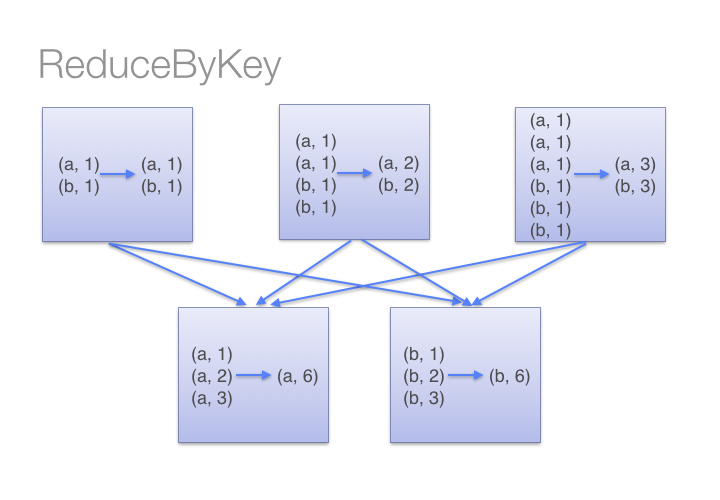

In [31]:
Image('reducebykey.png')

In [4]:
testRDD=sc.parallelize([('a',1),('b',1),('a',3),('b',2),('a',10),('b',5)])

In [5]:
testRDD.reduceByKey(lambda x,y:x+y).collect()

[('b', 8), ('a', 14)]

In [6]:
testRDD.reduceByKey(max).collect()

[('b', 5), ('a', 10)]

In [7]:
testRDD.reduceByKey(min).collect()

[('b', 1), ('a', 1)]

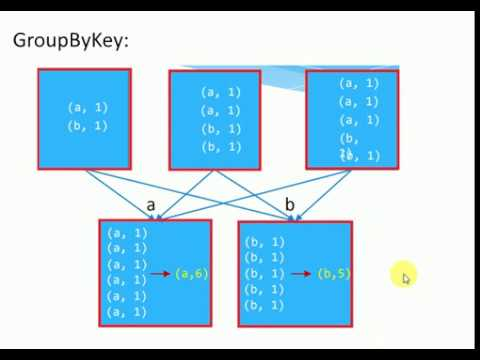

In [11]:
Image('groupbykey.jpg')

In [12]:
# GroupbyKey groups all rows into single row based on the key
groupedData=testRDD.groupByKey().collect()

In [13]:
for i,data in groupedData:
    print(i, list(data))

b [1, 2, 5]
a [1, 3, 10]


In [15]:
testRDD.groupByKey().mapValues(sum).collect()

[('b', 8), ('a', 14)]

In [ ]:
# ReducebyKey= groupByKey().mapValues 

In [21]:
testRDD.flatMapValues(lambda x: (100,10,x)).collect()

[('a', 100),
 ('a', 10),
 ('a', 1),
 ('b', 100),
 ('b', 10),
 ('b', 1),
 ('a', 100),
 ('a', 10),
 ('a', 3),
 ('b', 100),
 ('b', 10),
 ('b', 2),
 ('a', 100),
 ('a', 10),
 ('a', 10),
 ('b', 100),
 ('b', 10),
 ('b', 5)]

In [18]:
testRDD.collect()

[('a', 1), ('b', 1), ('a', 3), ('b', 2), ('a', 10), ('b', 5)]

In [25]:
data1=sc.parallelize([(1,2),(2,4),(2,1),(1,5),(3,2)])
data2=sc.parallelize([(1,2)])

In [26]:
data1.subtractByKey(data2).collect()

[(2, 4), (2, 1), (3, 2)]

In [27]:
data2.subtractByKey(data1).collect()

[]

In [28]:
data=sc.parallelize([(1,2),(3,4),(3,6),(3,4)])
data2=sc.parallelize([(3,9),(4,15)])

In [29]:
# Inner Join search for common keys
data.join(data2).collect()

[(3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [30]:
data2.join(data).collect() # only order will be differ

[(3, (9, 4)), (3, (9, 6)), (3, (9, 4))]

In [31]:
data.rightOuterJoin(data2).collect() # Gives None if key not present in right rdd

[(3, (4, 9)), (3, (6, 9)), (3, (4, 9)), (4, (None, 15))]

In [32]:
data.leftOuterJoin(data2).collect() # Gives None if key not present in right rdd

[(1, (2, None)), (3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [ ]:
# RDD has some drawbacks so in some cases we prefer SQL Dataframe